In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Get list of fixtures
fixtures = pd.read_csv('Fixtures.csv')
fixtures = fixtures.set_index('Week')

#For each week so far --- NEED TO CHANGE THE RANGE BELOW ACCORDINGLY (END IS EXCLUSIVE SO 39 FOR FULL SEASON)
for w in range(1,21):
    
    #Load those stats for the starting players each week
    stats = pd.read_csv('week%s.csv'%w)
    
    #Start with all stats - some like CS (corners?) and %s will need adjusted, more can be dropped
    stats.drop(['6S','A/90M','A/G','FC/G','G/90M','G/G','GS','GP','Min','Off/90M','Off/G','Pt/90M','Pt/G',
                'Sh/90M','Sh/G','ShG/90M','ShG/G','SubOff','W','L','T'], axis=1, inplace=True)
    
    weekly_sums = stats.groupby(['Team']).sum()
    weekly_sums['Venue'] = 'H'
    weekly_sums['Opp'] = 'xxx'

    #Get weekly fixture information
    home = list(fixtures.ix[w,'Home'])
    away = list(fixtures.ix[w,'Away'])

    #For each fixture
    for x in range(0,len(home)):
        
        #Add in fixture information
        weekly_sums['Opp'][home[x]] = away[x]
        weekly_sums['Venue'][away[x]] = 'A'
        weekly_sums['Opp'][away[x]] = home[x]
    
    if w == 1 :
        team_sums = weekly_sums.reset_index()
    else :
        team_sums = team_sums.append(weekly_sums.reset_index())
            
team_sums

    

/Users/pd8258/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pd8258/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pd8258/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Team,A,ABS,ACr,AFKG,AHW,AL,AOG,APKG,APL,...,Sv,Sv%,SvIB,SvOB,TLM,Tk,TkW,YC,Venue,Opp
0,ARS,0,0,9,0,0,19,0,0,0,...,2,50.0,1,1,0,12,9,1,H,WHU
1,AVL,1,0,1,0,0,18,0,0,0,...,2,100.0,2,0,0,25,21,4,A,BOUR
2,BOUR,0,0,4,0,0,21,0,0,0,...,2,66.7,1,1,0,14,6,3,H,AVL
3,CHE,0,0,3,1,0,21,1,0,0,...,7,155.0,4,3,0,16,12,1,H,SWA
4,CRY,3,0,5,0,0,6,0,0,0,...,4,80.0,2,2,0,14,14,0,A,NOR
5,EVE,2,0,6,0,0,29,0,0,0,...,3,60.0,1,2,0,14,10,1,H,WAT
6,LEIC,2,0,9,0,0,25,0,0,1,...,3,60.0,3,0,0,19,15,2,H,SUN
7,LIV,1,0,5,0,0,16,0,0,0,...,1,100.0,0,1,0,19,15,4,A,STK
8,MCI,3,0,4,0,0,6,0,0,0,...,2,100.0,1,1,0,10,9,1,A,WBA
9,MUN,0,0,1,0,0,11,0,0,1,...,4,100.0,3,1,0,21,19,2,H,TOT


In [1]:
# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline



/Users/pd8258/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


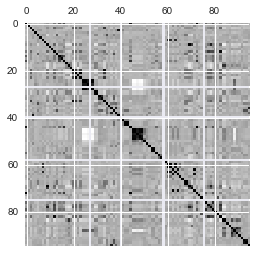

In [3]:
plt.matshow(team_sums.corr())


/Users/Shruti/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [4]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

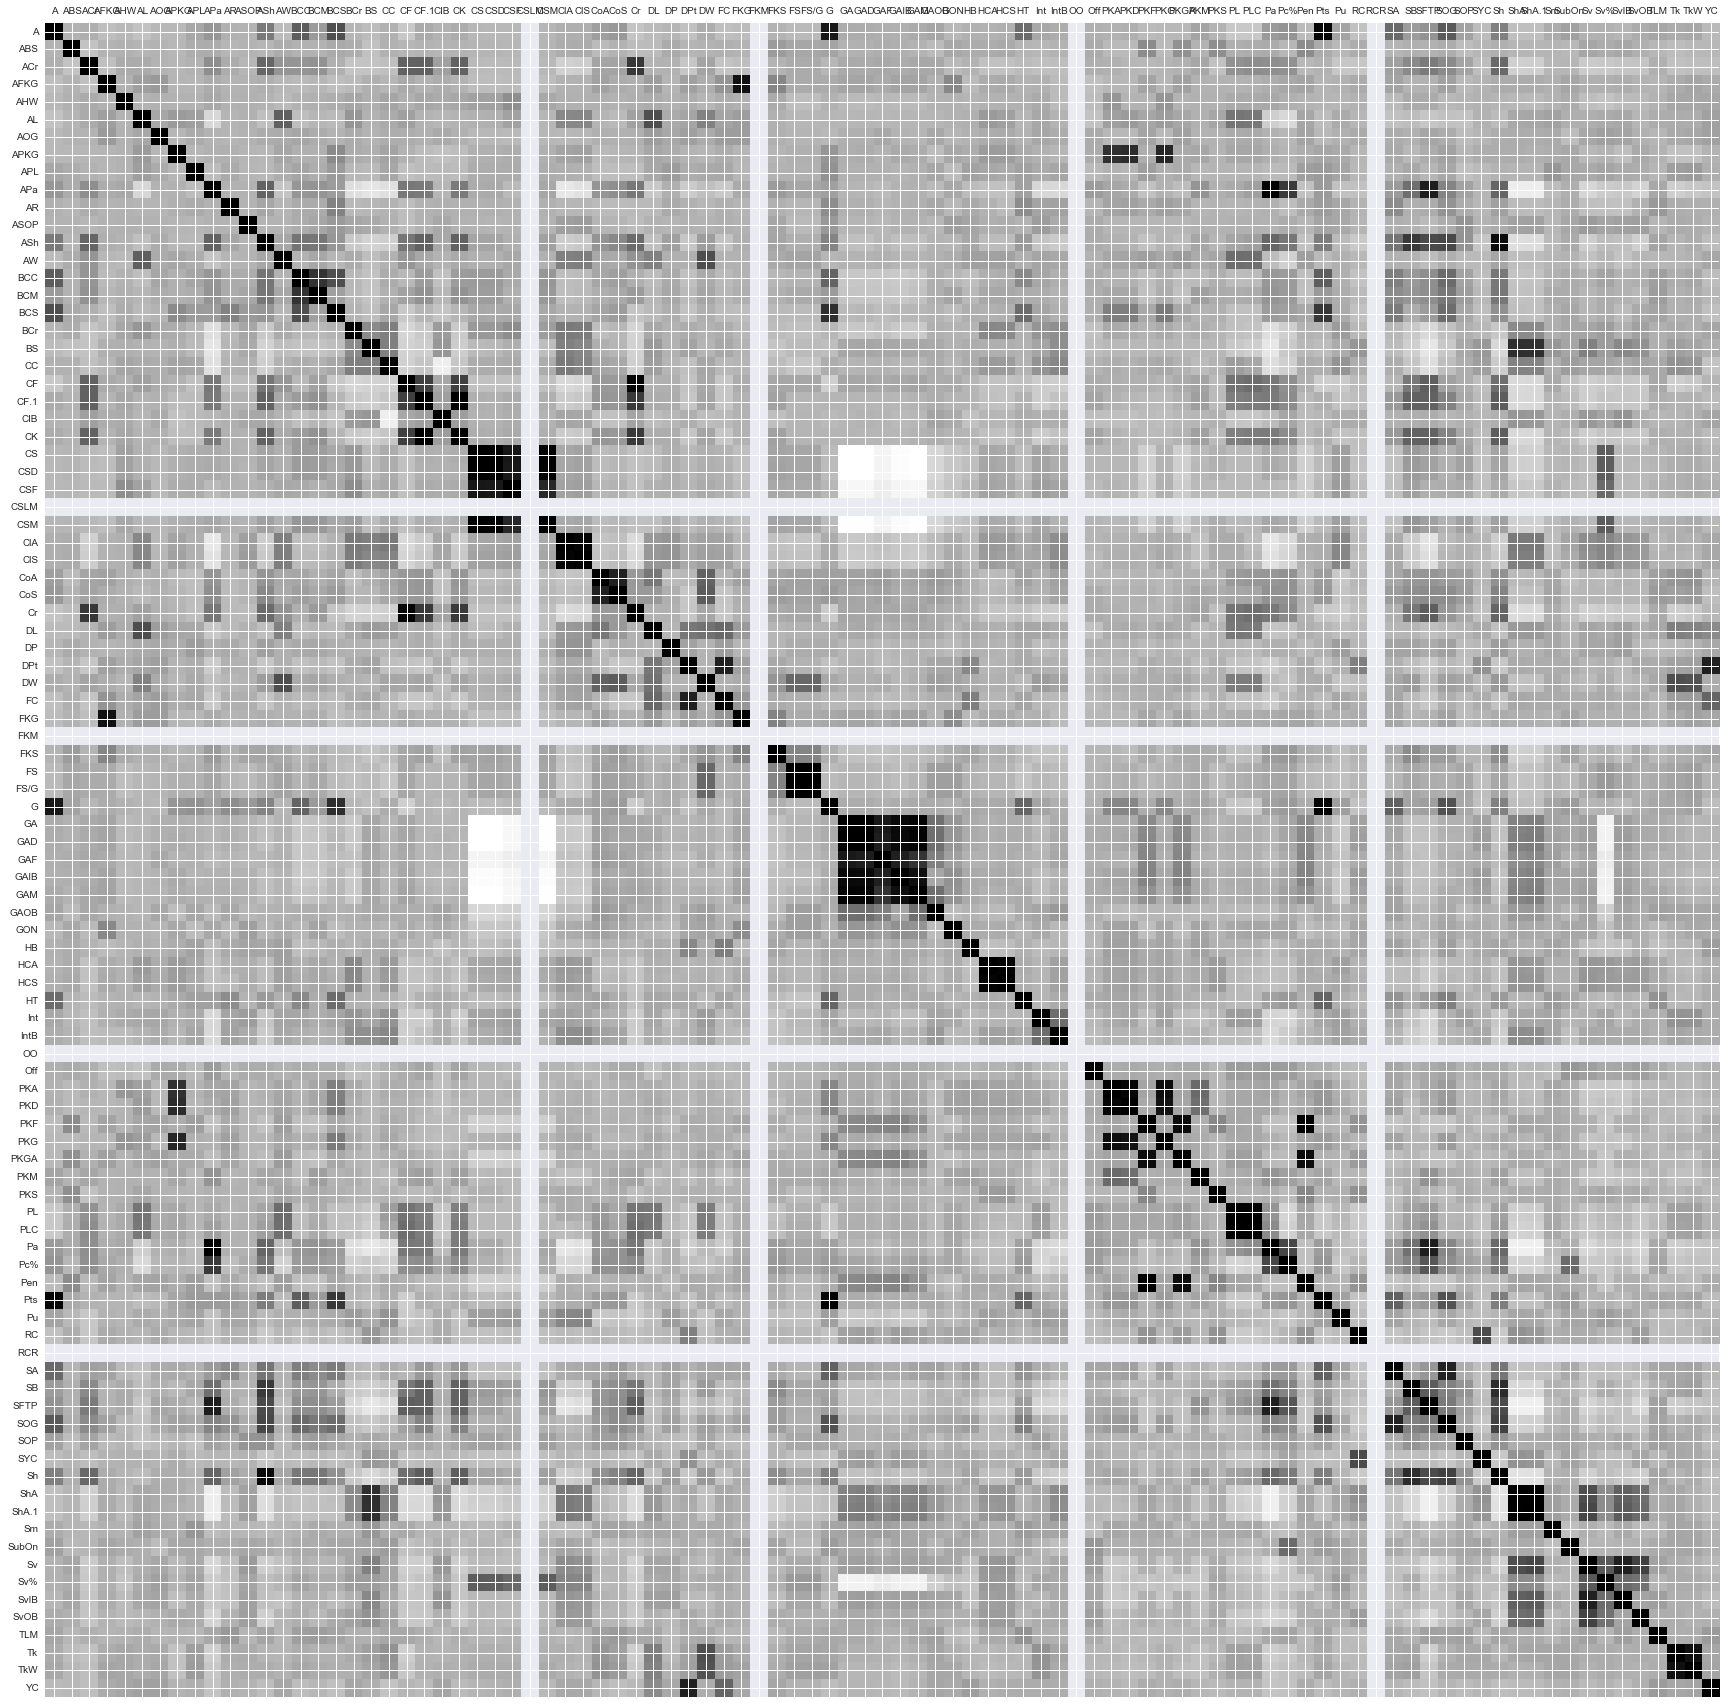

In [6]:
plot_corr(team_sums,30)